## 1. Fundamental
It is a **classification technique** based on **Bayes’ theorem** with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, a naive Bayes classifier would consider all of these properties to independently contribute to the probability that this fruit is an apple.

Naive Bayesian model is **easy to build** and particularly **useful** for **very large data sets**. Along with simplicity, Naive Bayes is known to **outperform even highly sophisticated classification methods**.

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Bayes_rule.png)

Here,

- $P(c|x)$ is the posterior probability of class (target) given predictor (attribute). 
- $P(c)$ is the prior probability of class. 
- $P(x|c)$ is the likelihood which is the probability of predictor given class. 
- $P(x)$ is the prior probability of predictor.

Example: Let’s understand it using an example. Below I have a training data set of weather and corresponding target variable ‘Play’. Now, we need to classify whether players will play or not based on weather condition. Let’s follow the below steps to perform it.

- *Step 1*: Convert the data set to frequency table
- *Step 2*: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Bayes_41-850x310.png)
- *Step 3*: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

Problem: Players will pay if weather is sunny, is this statement is correct?<br>
We can solve it using above discussed method, so P(Yes|Sunny) = P(Sunny|Yes) * P(Yes)/P(Sunny)<br>
Here we have P(Sunny|Yes) = 3/9 = 0.33, P(Sunny) = 5/14 = 0.36, P(Yes)= 9/14 = 0.64<br>
Now, P(Yes|Sunny) = 0.33* 0.64/0.36 = 0.60, which has higher probability.

Naive Bayes uses a similar method to predict the probability of different class based on various attributes. This algorithm is mostly used in text classification and with problems having multiple classes.
[From scratch](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/)

## 2. Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.metrics import confusion_matrix

In [2]:
# load data
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# build and train model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(iris.data, iris.target)

GaussianNB(priors=None)

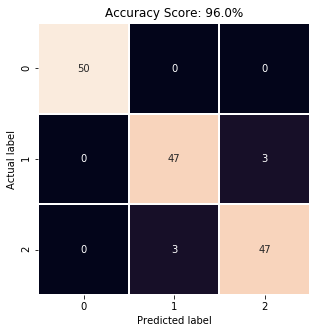

In [4]:
# calculate confusion matrices
prediction = gnb.predict(iris.data)
cm = confusion_matrix(y_true=iris.target, y_pred=prediction)
acc = gnb.score(X=iris.data, y=iris.target)

# visualization with seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=1, square=True, cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: %.1f'%(acc*100) + '%'
plt.title(all_sample_title, size = 12);

In [5]:
# Model summaries
print('Number of feature:', iris.data.shape[1])
print('Probability of each class:\n', gnb.class_prior_)
print('Number of training samples observed in each class:\n', gnb.class_count_)
print('Mean of each feature per class:\n', gnb.theta_)
print('Variance of each feature per class:\n', gnb.sigma_)

Number of feature: 4
Probability of each class:
 [0.33333333 0.33333333 0.33333333]
Number of training samples observed in each class:
 [50. 50. 50.]
Mean of each feature per class:
 [[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
Variance of each feature per class:
 [[0.121764 0.142276 0.029504 0.011264]
 [0.261104 0.0965   0.2164   0.038324]
 [0.396256 0.101924 0.298496 0.073924]]


## 3. Advanced in math - How to train & infer

**Gaussian Naive Bayesian** to train for Feature X (shape = number of samples $M$, number of features $N$), label y (shape = $(M, 1)$)
- Training:
    - Group by class (total number - $K$), calculate prior (based on frequency) of each class - $p(c_k) = m_k/M$
    - Supose in each class each feature has gaussian distribution
    - Estimate mean $\mu_{k,n}$ and standard deviation $\sigma_{k,n}$ of each feature for each class
- Prediction:
    - Calculate probability $p(x_{m,n}|c_k) = \text{Gaussian}(x_{m,n}, \mu_{k,n}, \sigma_{k,n})$
    - Supose features are independent, calculate likelihood $p(X_m|c_k) = \prod_{n}{p(x_{m,n}|c_k)}$
    - Calculate posterior (or probability each sample belong to each class) $p(c_k|X_m) = \frac{p(X_m|c_k)p(c_k)}{p(X_m)}$ 
    - Return class with largest posterior $p(c_k|X_m)$

In [6]:
# how to get predictiton
def gaussian(x, mu, sig):
    """
    return gaussian probability of value x with mean mu and standard deviation sig
    """
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

Xtest = iris.data[[0, 60, 140]]
numclass = 3  # number of classes
numfeat = 4   # number of feature
mu = gnb.theta_
sig = gnb.sigma_
pclass = gnb.class_prior_
# feature shape = (3,4)
# get probability each feature per class, shape = (number of sample, number of classes, number of feature)
prob_xij_ck = \
gaussian(np.tile(Xtest, (1,1,numclass)).reshape(Xtest.shape[0],numclass,numfeat), mu, sig)
# get probability each sample per class, shape = (number of sample, number of classes)
prob_xi_ck = np.multiply.reduce(prob_xij_ck,2)
# get prediction
prediction = (prob_xi_ck*pclass).argmax(axis=1)
print("Bayes prediction:\t", prediction)
print("Prediction by model:\t", gnb.predict(Xtest))

Bayes prediction:	 [0 1 2]
Prediction by model:	 [0 1 2]
